In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

In [2]:
data_pd = pd.read_csv("../data_cleaned.csv")
data_pd.head()

,index,SampleID,Age,Sex,Nationality,Diversity,BMI_group,Actinomycetaceae,Aerococcus,Aeromonas,...,Uncultured Clostridium (sensu stricto)les I,Uncultured Clostridium (sensu stricto)les II,Uncultured Mollicutes,Uncultured Selenomonadaceae,Veillonella,Vibrio,Weissella et rel.,Wissella et rel.,Xanthomonadaceae,Yersinia et rel.
0,0,Sample-1,28.0,male,US,5.76,severeobese,72.018955,36.677499,42.602327,...,1104.414062,1028.468474,521.322821,106.394227,211.821670,154.965223,171.075788,61.107101,77.708572,148.457166
1,1,Sample-2,24.0,female,US,6.06,obese,71.617440,35.093902,38.339812,...,18897.145365,10796.271198,4415.402080,56.550318,200.735634,167.467197,116.656049,55.221793,75.723312,148.153760
2,2,Sample-3,52.0,male,US,5.50,lean,76.788552,36.468459,41.049680,...,9941.426890,2382.601913,2705.456410,35.087364,143.295196,177.587051,137.614018,36.587206,78.451328,151.829451
3,3,Sample-4,22.0,female,US,5.87,underweight,74.153361,35.983472,40.919850,...,1707.346473,2881.873156,575.770921,35.909907,180.882271,205.570562,115.188297,44.524188,82.810934,152.548577
4,4,Sample-5,25.0,female,US,5.89,lean,77.065064,37.466006,42.746629,...,32454.018243,7598.565773,16017.026792,54.862005,223.830484,174.345496,138.353411,63.445514,86.347452,156.447511


Load and prepocess the data:

In [4]:
# Load and preprocess the bacterial abundance data
bacterial_abundance = np.array(data_pd.values[:,7:])
bacterial_abundance_normalized = preprocessing.Normalizer().fit_transform(bacterial_abundance)

Clustering:

In [5]:
# Initialize the clustering algorithms
# try eps = [0.3,0.31,0.32,0.33,0.5], min_samples = [3,4,5,10,20].
# eps=0.3 and min_samples=20 appear to work well with PCA
dbscan_clustering = DBSCAN(eps=0.3, min_samples=20)
kmeans_4_clustering = KMeans(n_clusters=4)
kmeans_8_clustering = KMeans(n_clusters=8)

# Fit the clustering algorithms to the normalized bacterial abundance data
dbscan_labels = dbscan_clustering.fit_predict(bacterial_abundance_normalized)
kmeans_4_labels = kmeans_4_clustering.fit_predict(bacterial_abundance_normalized)
kmeans_8_labels = kmeans_8_clustering.fit_predict(bacterial_abundance_normalized)

# Inspect the unique labels from the clustering algorithms
print(np.unique(dbscan_labels))
print(np.unique(kmeans_4_labels))
print(np.unique(kmeans_8_labels))

# Check whether all clusters contain a reasonable number of samples
for i in range(-1, len(np.unique(dbscan_labels))-1):
    print("cluster ", i, " has size: ", len(
        dbscan_labels[dbscan_labels == i]))

[-1  0  1  2  3]
[0 1 2 3]
[0 1 2 3 4 5 6 7]
cluster  -1  has size:  687
cluster  0  has size:  158
cluster  1  has size:  80
cluster  2  has size:  55
cluster  3  has size:  77


Dimensionality Reduction:

<span style="font-size: 85%">

We perform dimensionality reduction using PCA, KernelPCA, and TSNE, projecting the bacterial abundance data into 2D space for visualization.\
In an iterative exploratory process I tried different clustering hyperparameters, visualizing them on the projected data. In this iterative process I found I can visually discern 4 clusters with PCA and KernelPCA, which with TSNE I can visually discern e.g. 8 clusters. Therefore the K-Means algorithm was initialized with 4 and 8 cluster centers.
</span>

In [ ]:
# Initialize the dimensionality reduction models
pca_model = PCA(n_components=2)
kernel_pca_model = KernelPCA(n_components=2, kernel="rbf", gamma=4) # (choose gamma 4 to 10)
tsne_model = TSNE(n_components=2, perplexity=30)

# Fit the dimensionality reduction models to the normalized bacterial abundance data
pca_projected_data = pca_model.fit_transform(bacterial_abundance_normalized)
kernel_pca_projected_data = kernel_pca_model.fit_transform(bacterial_abundance_normalized)
tsne_projected_data = tsne_model.fit_transform(bacterial_abundance_normalized)

Visualization:

/tmp/ipykernel_11018/2933788210.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


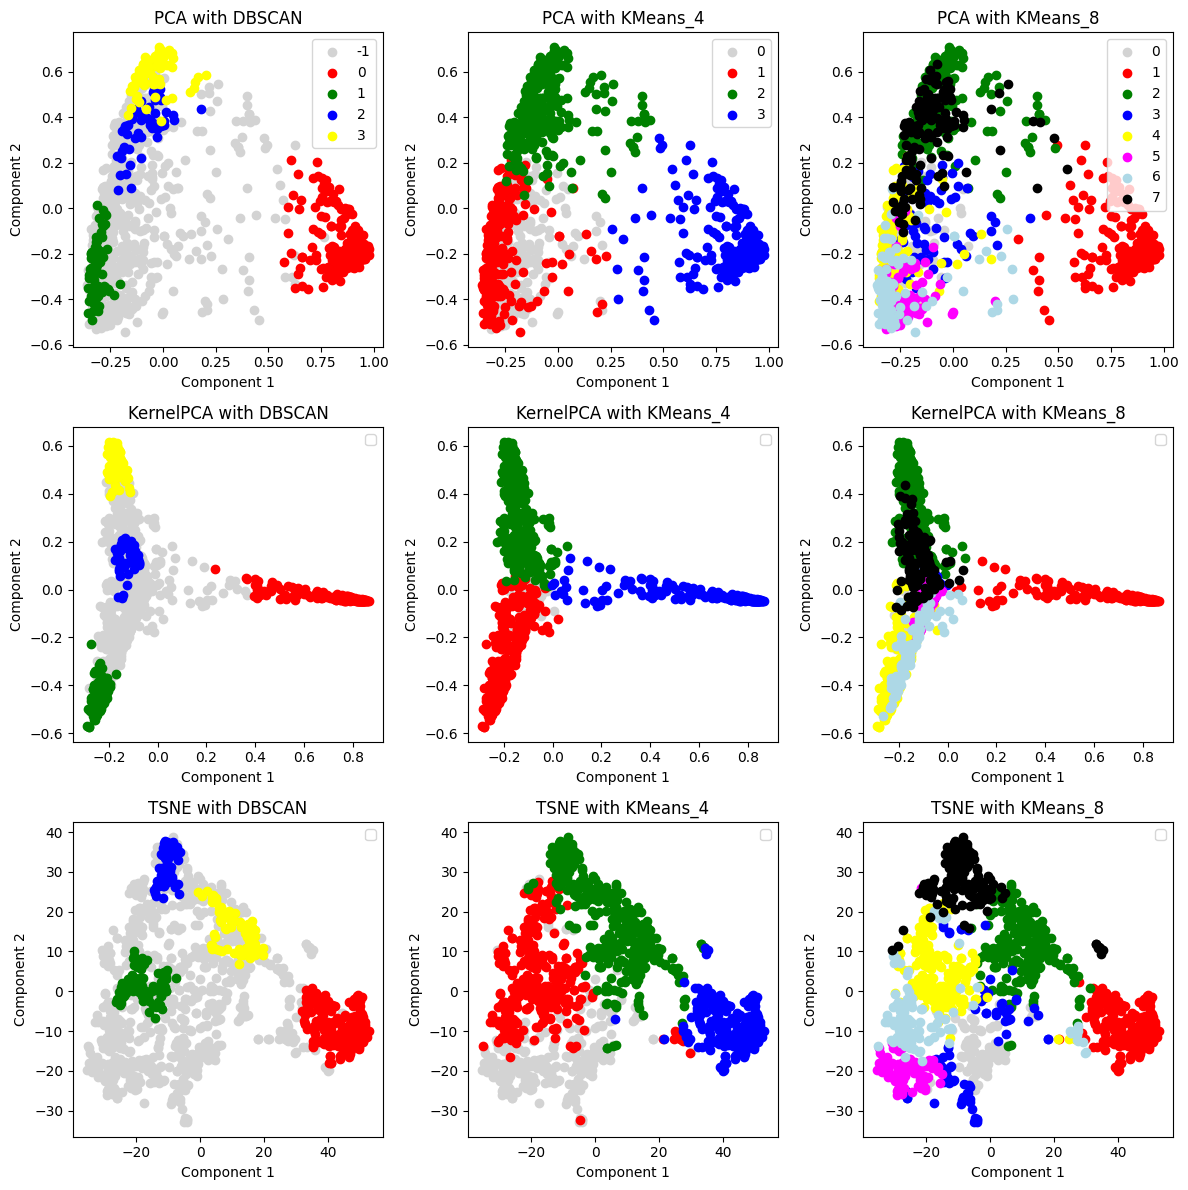

In [7]:
# Visualize the projected data with each combination of projection and clustering method

# dictionaries of projection method and clustering method for plotting
projected_data = {"PCA": pca_projected_data,
                 "KernelPCA": kernel_pca_projected_data,
                 "TSNE": tsne_projected_data}
labels = {"DBSCAN": dbscan_labels,
          "KMeans_4": kmeans_4_labels,
          "KMeans_8": kmeans_8_labels}

# Define colors for the clusters
colors = ["lightgrey","red", "green", "blue", "yellow", "magenta", "lightblue", "black", "brown"]

# Create subplots for each combination of projection and clustering method
# The data points are scattered in the 2D projection space, colored by their cluster labels
fig, axs = plt.subplots(len(projected_data), len(labels), figsize=(len(projected_data) * 4, len(labels) * 4))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration
for i, (proj_name, proj_data) in enumerate(projected_data.items()):
    for j, (label_name, labels_data) in enumerate(labels.items()):
        ax = axs[i * len(labels) + j]
        for k, l in enumerate(np.unique(labels_data)):
            cluster_data = proj_data[labels_data == l]
            ax.scatter(cluster_data[:, 0], cluster_data[:, 1],
                       c=colors[k], label=l if i == 0 else "")
        ax.set_title(f"{proj_name} with {label_name}")
        ax.legend()
        ax.set_xlabel("Component 1")
        ax.set_ylabel("Component 2")
plt.tight_layout()
plt.show()

Export the cluster labels and the projected data as csv:

In [ ]:
# Combine the clustering labels and projected data into a final DataFrame
data_final = np.concatenate(
    [dbscan_labels[:, np.newaxis], kmeans_4_labels[:, np.newaxis], kmeans_8_labels[:, np.newaxis], 
    pca_projected_data, kernel_pca_projected_data, tsne_projected_data], axis=1)
data_final = pd.DataFrame(data_final, columns=[
                          "dbscan", "kmeans_4", "kmeans_8", "x_pca", "y_pca", "x_kernel_pca", "y_kernel_pca", "x_tsne", "y_tsne"])
data_final[["dbscan","kmeans_4", "kmeans_8"]] = data_final[["dbscan","kmeans_4", "kmeans_8"]].astype(int)

# Export the final DataFrame to a CSV file or show it in the notebook:
# data_final.to_csv("cluster_data.csv",sep=",")
data_final.head()


,dbscan,kmeans_4,kmeans_8,x_pca,y_pca,x_kernel_pca,y_kernel_pca,x_tsne,y_tsne
0,-1,1,6,-0.318410,-0.382236,-0.160720,-0.286891,-30.342247,-7.568961
1,-1,3,1,0.409934,-0.213912,0.224596,-0.043980,28.615515,-10.438631
2,-1,2,2,-0.004622,0.570393,-0.093069,0.287185,18.882589,13.294174
3,-1,0,5,-0.253121,-0.078202,-0.088237,-0.025011,-21.491716,25.911634
4,-1,0,5,-0.236352,-0.255332,-0.080700,-0.062467,-25.846146,-19.894947


Explorative data analysis of cluster-based sample-selections for the histogram plot:

In [ ]:
def metadata_distributions(dataframe, features = ["Sex", "Nationality", "BMI_group"]):
    """
    Create a list of dictionaries of the distributions of selected features of a selected samples of the data.

    Parameters:
    dataframe : pd.DataFrame
        The DataFrame containing the data.
    features : list of str, optional
        The list of feature names (columns) for which to compute distributions. Default is ["Sex", "Nationality", "BMI_group"].

    Returns:
    list of dict
        A list of dictionaries, each containing the percentage distribution of unique values for a feature.
    """ 
    feature_dist = []
    for feature in features:
        percentages = {}
        for group in np.unique(dataframe[feature]):
            percentages[group] = len(
                dataframe[dataframe[feature] == group]) / len(dataframe[feature])
        feature_dist.append(percentages)
    return feature_dist

Distributions of all data:  [{'female': 0.6111636707663197, 'male': 0.3888363292336802}, {'CentralEurope': 0.5837275307473982, 'EasternEurope': 0.000946073793755913, 'Scandinavia': 0.26017029328287605, 'SouthEurope': 0.08514664143803216, 'UKIE': 0.03784295175023652, 'US': 0.03216650898770104}, {'lean': 0.4607379375591296, 'morbidobese': 0.020813623462630087, 'obese': 0.2119205298013245, 'overweight': 0.1901608325449385, 'severeobese': 0.0946073793755913, 'underweight': 0.021759697256385997}]


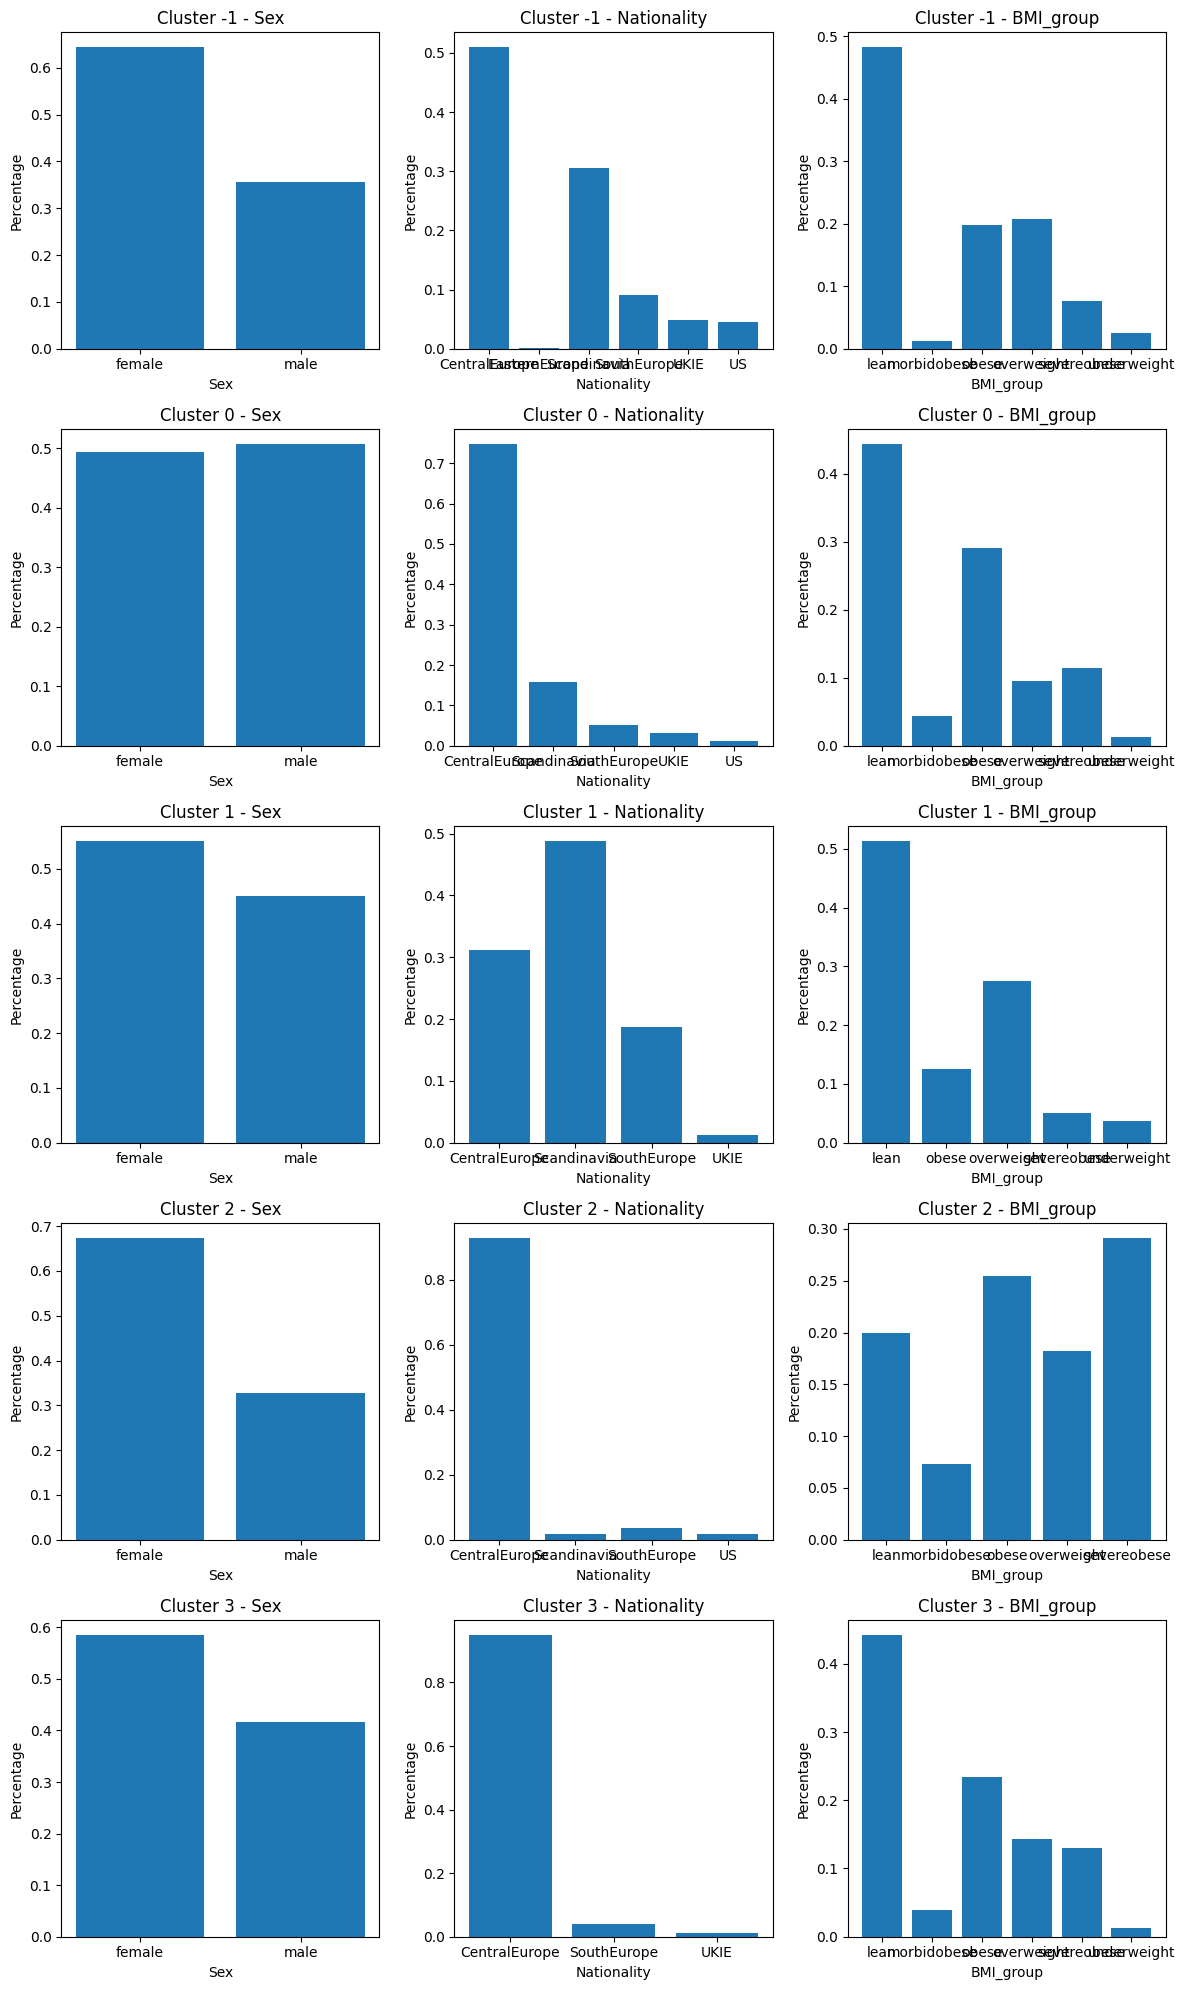

In [ ]:
# Explorative data analysis of cluster-based sample-selections for the histogram plot
# create a histogram plot for the dbscan clusters and for each feature in ["Sex", "Nationality", "BMI_group"]
features = ["Sex", "Nationality", "BMI_group"]
fig, axs = plt.subplots(len(np.unique(dbscan_labels)), len(features), figsize=(len(features) * 4, len(np.unique(dbscan_labels)) * 4))
for i, l in enumerate(np.unique(dbscan_labels)):
    idx = np.where(dbscan_labels == l)[0]
    selection = data_pd.iloc[idx]
    for j, feature in enumerate(features):
        axs[i, j].bar(metadata_distributions(selection)[j].keys(), metadata_distributions(selection)[j].values())
        axs[i, j].set_title(f"Cluster {l} - {feature}")
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel("Percentage")
plt.tight_layout()
plt.show()